In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np

In [2]:
uc_df = pd.read_csv("./attributeData/userChoices.csv", header=None)
uc_df.columns = ['attribute', 'hit_id', 'user_id', 'font_a_name', 'font_b_name', 'user_choice']

In [3]:
uc_df

,attribute,hit_id,user_id,font_a_name,font_b_name,user_choice
0,modern,3,2,GentiumBasic-BoldItalic,AllertaStencil-Regular,more
1,modern,3,3,GentiumBasic-BoldItalic,AllertaStencil-Regular,more
2,modern,3,4,GentiumBasic-BoldItalic,AllertaStencil-Regular,more
3,modern,3,5,GentiumBasic-BoldItalic,AllertaStencil-Regular,less
4,modern,3,6,GentiumBasic-BoldItalic,AllertaStencil-Regular,less
5,modern,3,7,GentiumBasic-BoldItalic,AllertaStencil-Regular,less
6,modern,3,8,GentiumBasic-BoldItalic,AllertaStencil-Regular,more
7,modern,3,9,GentiumBasic-BoldItalic,AllertaStencil-Regular,less
8,modern,4,2,Asset,CantoraOne-Regular,less
9,modern,4,5,Asset,CantoraOne-Regular,less


In [4]:
unique_font_a_names = uc_df.font_a_name.unique()
unique_font_b_names = uc_df.font_b_name.unique()
unique_attributes = uc_df.attribute.unique()
unique_users = uc_df.user_id.unique()

number_of_unique_font_a = len(unique_font_a_names)
number_of_unique_font_b = len(unique_font_b_names)
number_of_unique_attributes = len(unique_attributes)
number_of_unique_users = len(unique_users)

print(number_of_unique_font_a)
print(number_of_unique_font_b)
print(number_of_unique_attributes)
print(number_of_unique_users)

np.array_equal(np.sort(unique_font_a_names), np.sort(unique_font_b_names))

print(uc_df.shape)

200
200
31
639
(198400, 6)


In [5]:
print(np.sort(unique_users))

[  2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 24

In [6]:
def get_unique_dict(unique_values):
    dict_id_to_name = dict(enumerate(unique_values))
    dict_name_to_id = dict((y,x) for x, y in dict_id_to_name.iteritems())
    return dict_id_to_name, dict_name_to_id

In [7]:
font_id_to_name_dict, font_name_to_id_dict  = get_unique_dict(unique_font_a_names)
id_to_attribute_dict, attribute_to_id_dict = get_unique_dict(unique_attributes)

In [8]:
font_name_to_id_dict

{'ARSMaquetteWebOne': 123,
 'Acme-Regular': 40,
 'AdventPro-SemiBold': 19,
 'Aldrich': 103,
 'Alegreya-BoldItalic': 175,
 'AllertaStencil-Regular': 18,
 'Amethysta-Regular': 44,
 'Andada-Bold': 70,
 'Andada-Italic': 80,
 'AndadaSC-Bold': 108,
 'AnonymousPro': 153,
 'ArchivoNarrow-Regular': 137,
 'ArialRoundedMTBold': 91,
 'ArialUnicodeMS': 167,
 'Arimo-Bold': 94,
 'Arimo-BoldItalic': 105,
 'Arizonia-Regular': 38,
 'Arvo-Bold': 9,
 'Arvo-BoldItalic': 152,
 'Arvo-Italic': 5,
 'Asap-Regular': 133,
 'Asset': 1,
 'Astloch-Bold': 32,
 'AveriaLibre-LightItalic': 99,
 'AveriaSansLibre-Italic': 45,
 'AveriaSerifLibre-Italic': 180,
 'BadScript-Regular': 65,
 'Bello-Pro': 7,
 'BenchNine-Regular': 63,
 'Bentham-Regular': 126,
 'Bevan': 90,
 'BilboSwashCaps-Regular': 43,
 'BlackOpsOne-Regular': 102,
 'BowlbyOneSC-Regular': 82,
 'Brevia-Regular': 121,
 'BubblerOne': 95,
 'Buenard-Bold': 159,
 'Cabin-SemiBoldItalic': 28,
 'CabinCondensed': 72,
 'CabinCondensed-Medium': 47,
 'Calluna-Regular': 53,
 'C

In [9]:
font_id_to_name_dict

{0: 'GentiumBasic-BoldItalic',
 1: 'Asset',
 2: 'ShareTech-Regular',
 3: 'Iceland-Regular',
 4: 'Oswald-Bold',
 5: 'Arvo-Italic',
 6: 'Roboto-MediumItalic',
 7: 'Bello-Pro',
 8: 'Syncopate-Bold',
 9: 'Arvo-Bold',
 10: 'ModernAntiqua-Regular',
 11: 'Marvel-Bold',
 12: 'PressStart2P-Regular',
 13: 'Oldenburg-Regular',
 14: 'Sevillana-Regular',
 15: 'Roboto-Black',
 16: 'Palatino-Roman',
 17: 'SourceCodePro-Black',
 18: 'AllertaStencil-Regular',
 19: 'AdventPro-SemiBold',
 20: 'FanwoodText-Italic',
 21: 'Megrim',
 22: 'LobsterTwo-Italic',
 23: 'NovaRound',
 24: 'Strait-Regular',
 25: 'Fenix',
 26: 'Slackey',
 27: 'Simonetta-Black',
 28: 'Cabin-SemiBoldItalic',
 29: 'UbuntuMono-Bold',
 30: 'GEInspira',
 31: 'OFLGoudyStMTT',
 32: 'Astloch-Bold',
 33: 'OriginalSurfer-Regular',
 34: 'GFSNeohellenic-Italic',
 35: 'FredokaOne-Regular',
 36: 'HoeflerText-Regular',
 37: 'Signika-Semibold',
 38: 'Arizonia-Regular',
 39: 'Futura-Medium',
 40: 'Acme-Regular',
 41: 'Philosopher',
 42: 'Tinos',
 43: '

In [10]:
id_to_attribute_dict

{0: 'modern',
 1: 'playful',
 2: 'clumsy',
 3: 'sharp',
 4: 'graceful',
 5: 'angular',
 6: 'strong',
 7: 'attention-grabbing',
 8: 'artistic',
 9: 'attractive',
 10: 'complex',
 11: 'calm',
 12: 'friendly',
 13: 'happy',
 14: 'legible',
 15: 'sloppy',
 16: 'warm',
 17: 'delicate',
 18: 'charming',
 19: 'formal',
 20: 'wide',
 21: 'disorderly',
 22: 'gentle',
 23: 'technical',
 24: 'boring',
 25: 'pretentious',
 26: 'bad',
 27: 'dramatic',
 28: 'thin',
 29: 'fresh',
 30: 'soft'}

In [11]:
attribute_to_id_dict

{'angular': 5,
 'artistic': 8,
 'attention-grabbing': 7,
 'attractive': 9,
 'bad': 26,
 'boring': 24,
 'calm': 11,
 'charming': 18,
 'clumsy': 2,
 'complex': 10,
 'delicate': 17,
 'disorderly': 21,
 'dramatic': 27,
 'formal': 19,
 'fresh': 29,
 'friendly': 12,
 'gentle': 22,
 'graceful': 4,
 'happy': 13,
 'legible': 14,
 'modern': 0,
 'playful': 1,
 'pretentious': 25,
 'sharp': 3,
 'sloppy': 15,
 'soft': 30,
 'strong': 6,
 'technical': 23,
 'thin': 28,
 'warm': 16,
 'wide': 20}

In [12]:
df2 = uc_df.replace({'font_a_name' : font_name_to_id_dict})
df2 = df2.replace({'font_b_name' : font_name_to_id_dict})
df2 = df2.replace({'attribute' : attribute_to_id_dict})

In [13]:
df2

,attribute,hit_id,user_id,font_a_name,font_b_name,user_choice
0,0,3,2,0,18,more
1,0,3,3,0,18,more
2,0,3,4,0,18,more
3,0,3,5,0,18,less
4,0,3,6,0,18,less
5,0,3,7,0,18,less
6,0,3,8,0,18,more
7,0,3,9,0,18,less
8,0,4,2,1,114,less
9,0,4,5,1,114,less


In [14]:
df3 = df2.loc[df2['attribute'] == 0]
print(df3.shape)
df3

(6400, 6)


,attribute,hit_id,user_id,font_a_name,font_b_name,user_choice
0,0,3,2,0,18,more
1,0,3,3,0,18,more
2,0,3,4,0,18,more
3,0,3,5,0,18,less
4,0,3,6,0,18,less
5,0,3,7,0,18,less
6,0,3,8,0,18,more
7,0,3,9,0,18,less
8,0,4,2,1,114,less
9,0,4,5,1,114,less


In [15]:
def get_weight_array(attribute_id):
    df3 = df2.loc[df2['attribute'] == attribute_id]
    number_of_samples = df3.shape[0]
    print(number_of_samples," rows with attribute", id_to_attribute_dict[attribute_id])
    samples = np.zeros((number_of_unique_font_a, number_of_samples))

    for index, row in df3.iterrows():
        font_a_index = row['font_a_name']
        font_b_index = row['font_b_name']

        samples[font_a_index, index] = 1
        samples[font_b_index, index] = 1

    y = df3['user_choice'] == 'more'
    return samples, y

In [16]:
X, y = get_weight_array(0)
print(X.shape)
print(X)

(6400, ' rows with attribute', 'modern')
(200L, 6400L)
[[ 1.  1.  1. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [17]:
y = [int(e) for e in y]
print(y[:10])
print(len(y))

[1, 1, 1, 0, 0, 0, 1, 0, 0, 0]
6400


In [18]:
def get_user_array(attribute_id):
    df3 = df2.loc[df2['attribute'] == attribute_id]
    number_of_samples = df3.shape[0]
    samples = np.zeros((number_of_unique_users, number_of_samples))

    for index, row in df3.iterrows():
        user_index = row['user_id'] - 2
        samples[user_index, index] = 1

    return samples

In [19]:
s2 = get_user_array(0)
print(s2.shape)
print(s2)

(639L, 6400L)
[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [20]:
import math

def sigmoid(x):
    g = np.array([x]).flatten()
    g =  float(1) / (1.0+(np.e**-g))
    return g

In [21]:
fonts, opinions = get_weight_array(0)
print(fonts)
print(fonts.shape)

opinions = [int(e) for e in opinions]
print(opinions[:50])
print(len(opinions))

users = get_user_array(0)
print(users)
print(users.shape)

(6400, ' rows with attribute', 'modern')
[[ 1.  1.  1. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
(200L, 6400L)
[1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1]
6400
[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
(639L, 6400L)


In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [23]:
all_weights = fonts
all_y = np.asarray(opinions)
all_users = users
m = len(opinions)

result_w = []
result_u = []
result_all = []

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

In [25]:
w = np.ones(number_of_unique_font_a)
u = np.ones(number_of_unique_users)

logreg1 = linear_model.LogisticRegression(C=1e5)
logreg2 = linear_model.LogisticRegression(C=1e5)
Y = all_y

for i in range(5):
    t2 = u.dot(all_users)
    X = np.multiply(t2, all_weights).T
    logreg1.fit(X, Y)
    new_w = logreg1.coef_
    
    t1 = w.dot(all_weights)
    U = np.multiply(t1, all_users).T
    logreg2.fit(U, Y)
    new_u = logreg2.coef_
    
    u = new_u
    w = new_w

In [26]:
print(w)

[[  1.50754779e+00  -3.05082737e-01  -1.27258996e-01   4.05298970e-01
   -1.75410799e-01   2.49965143e-01  -5.35630745e-01   4.00886464e-01
    1.30882689e-01  -1.72596005e-02   4.54745226e-01  -3.24859001e-01
   -1.04149059e+00   5.73937169e-02   1.88999450e-01  -3.74621002e-01
    5.14291529e-01   6.70723046e-01   8.11843219e-01  -4.38716722e-01
    4.84947337e-02  -2.29704146e-01   6.31424962e-02   6.37439043e-01
   -5.09739594e-02   6.97616318e-02   3.50848945e-02   2.14669540e-01
   -2.61723713e-01  -3.06666795e-01   9.73197135e-02   6.86783187e-01
    3.04227989e-01   4.51535073e-01   5.72614972e-01   6.83026172e-01
   -6.70565394e-02  -2.10232518e-01   3.72993948e-01  -2.88560792e-01
   -5.41320011e-02  -6.33314705e-01  -2.71860073e-01   1.52941193e-01
    1.10065474e-01  -6.39262200e-01  -1.31445834e-01   3.22748620e-01
    2.87404030e-01  -4.71163251e-01  -2.84000432e-01  -1.43838683e-01
   -2.31436609e-02   8.34825877e-02  -1.65935787e+00  -3.01986709e-01
   -3.47115018e-01  

In [27]:
print(logreg1.coef_)
print(logreg1.coef_.shape)

print(logreg2.coef_)
print(logreg2.coef_.shape)

[[  1.50754779e+00  -3.05082737e-01  -1.27258996e-01   4.05298970e-01
   -1.75410799e-01   2.49965143e-01  -5.35630745e-01   4.00886464e-01
    1.30882689e-01  -1.72596005e-02   4.54745226e-01  -3.24859001e-01
   -1.04149059e+00   5.73937169e-02   1.88999450e-01  -3.74621002e-01
    5.14291529e-01   6.70723046e-01   8.11843219e-01  -4.38716722e-01
    4.84947337e-02  -2.29704146e-01   6.31424962e-02   6.37439043e-01
   -5.09739594e-02   6.97616318e-02   3.50848945e-02   2.14669540e-01
   -2.61723713e-01  -3.06666795e-01   9.73197135e-02   6.86783187e-01
    3.04227989e-01   4.51535073e-01   5.72614972e-01   6.83026172e-01
   -6.70565394e-02  -2.10232518e-01   3.72993948e-01  -2.88560792e-01
   -5.41320011e-02  -6.33314705e-01  -2.71860073e-01   1.52941193e-01
    1.10065474e-01  -6.39262200e-01  -1.31445834e-01   3.22748620e-01
    2.87404030e-01  -4.71163251e-01  -2.84000432e-01  -1.43838683e-01
   -2.31436609e-02   8.34825877e-02  -1.65935787e+00  -3.01986709e-01
   -3.47115018e-01  

In [28]:

X = all_weights.T
Y = all_y

logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X, Y)

print(logreg.coef_)
print(logreg.coef_.shape)

[[ 1.28906698 -0.32055487  0.00930046  0.40452234  0.15348204  0.27683456
  -0.4387141   0.33644324  0.0843684  -0.27763227  0.28049349 -0.18286981
  -1.19878734 -0.08054426  0.22152416 -0.28814412  0.28598581  0.35223336
   0.46839141 -0.35385629  0.20616703 -0.2012839   0.07219472  0.26919681
  -0.18895989 -0.07429227 -0.15681577  0.17382532 -0.0994362   0.10228803
  -0.10464346  0.24992251  0.32025253  0.29035805  0.80791083  0.55107203
  -0.18860936 -0.35390497  0.43748486 -0.19575583 -0.0185011  -0.51405987
  -0.33270831  0.15704747  0.12621449 -0.71317656  0.04416804  0.0614092
   0.10767064 -0.21782097 -0.20214924 -0.03468887 -0.03161464  0.23475874
  -1.1497285  -0.17101097 -0.06778729  0.3367674   0.37461992 -0.17709241
  -0.37501035  0.32167647 -0.49035653 -0.39047424  0.87050165  0.33404789
  -0.33661289  0.36299356  0.64552922  0.3653997  -0.32622386 -0.63779013
   0.13478864 -0.0110859   0.0332427  -0.08067057 -0.21625145  0.33737663
  -0.06678102 -0.33977581  0.06463462 -

In [29]:
def cost_func1(W, U):
    t1 = W.T.dot(all_weights)
    t2 = U.T.dot(all_users)
    sig = sigmoid(np.multiply(t1,t2))
    retVal = (1. / m) * (-all_y.T.dot(np.log(sig)) - (1-all_y).T.dot(np.log(1-sig)))
    result_w.append(retVal)
    result_all.append(retVal)
    return retVal

def cost_func2(U, W):
    t1 = W.T.dot(all_weights)
    t2 = U.T.dot(all_users)
    sig = sigmoid(np.multiply(t1,t2))
    retVal = (1. / m) * (-all_y.T.dot(np.log(sig)) - (1-all_y).T.dot(np.log(1-sig)))
    result_w.append(retVal)
    result_all.append(retVal)
    return retVal

In [30]:
from scipy.optimize import minimize
from scipy.optimize import fmin

def plain_optimize():
    for i in range(2000):
        new_w = fmin(cost_func, w, args=(u,),maxiter=10)
        new_u = fmin(cost_func2, u, args=(w,),maxiter=10)
        w = new_w
        u = new_u

        clear_output()
        plt.plot(result_all)
        plt.show()


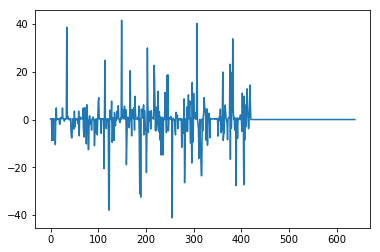

In [41]:
plt.plot(u.flatten())
plt.show()

In [32]:
w

array([[  1.50754779e+00,  -3.05082737e-01,  -1.27258996e-01,
          4.05298970e-01,  -1.75410799e-01,   2.49965143e-01,
         -5.35630745e-01,   4.00886464e-01,   1.30882689e-01,
         -1.72596005e-02,   4.54745226e-01,  -3.24859001e-01,
         -1.04149059e+00,   5.73937169e-02,   1.88999450e-01,
         -3.74621002e-01,   5.14291529e-01,   6.70723046e-01,
          8.11843219e-01,  -4.38716722e-01,   4.84947337e-02,
         -2.29704146e-01,   6.31424962e-02,   6.37439043e-01,
         -5.09739594e-02,   6.97616318e-02,   3.50848945e-02,
          2.14669540e-01,  -2.61723713e-01,  -3.06666795e-01,
          9.73197135e-02,   6.86783187e-01,   3.04227989e-01,
          4.51535073e-01,   5.72614972e-01,   6.83026172e-01,
         -6.70565394e-02,  -2.10232518e-01,   3.72993948e-01,
         -2.88560792e-01,  -5.41320011e-02,  -6.33314705e-01,
         -2.71860073e-01,   1.52941193e-01,   1.10065474e-01,
         -6.39262200e-01,  -1.31445834e-01,   3.22748620e-01,
        

In [33]:
import pickle
f1 = open("u","wb")
pickle.dump(u, f1)
f1.close()

f2 = open("w","wb")
pickle.dump(w, f2)
f2.close()

In [34]:
print(u.max(), u.min())
print(w.max(), w.min())

(41.545899029745357, -41.166724252197731)
(2.7145933599863286, -1.937944321277733)


In [35]:
def change_range(range1, min_dest, max_dest):
    min_r = range1.min()
    max_r = range1.max()
    
    return [float(max_dest - min_dest) / float(max_r - min_r) * (e - min_r) + min_dest for e in range1]

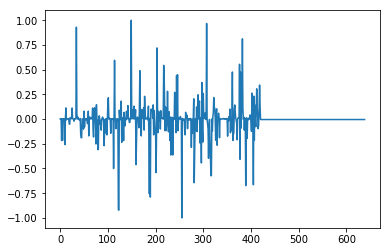

In [36]:
u_transformed = change_range(u.flatten(), -1.0, 1.0)
plt.plot(u_transformed)
plt.show()

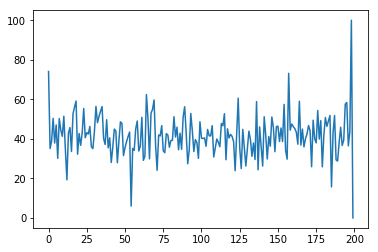

In [37]:
w_transformed = change_range(w.flatten(), 0, 100)
plt.plot(w_transformed)
plt.show()

In [38]:
print(w_transformed)

[74.056189329370667, 35.096149580242681, 38.918230216335473, 50.364842831443084, 37.883272372038427, 47.026152486384603, 30.14083221771519, 50.270002006592989, 44.466636317269383, 41.282518322813132, 51.427623177005437, 34.671085562744523, 19.268059636587022, 42.887090334115605, 45.715777430456491, 33.601518705028525, 52.707490363688841, 56.069774083361686, 59.102961201604252, 32.223867971677969, 42.695818735866673, 36.716310372641999, 43.010652564485277, 55.354379501847234, 40.5578738123276, 43.152921924152885, 42.407592391566467, 46.267521276726413, 36.028093119619335, 35.062102403023573, 43.745245589547949, 56.414965079928322, 48.192458899479909, 51.358625281331094, 53.961073840930908, 56.334213118641266, 40.212200524283354, 37.134826661805668, 49.670490123239766, 35.451266424616136, 40.489995982406654, 28.041247711950742, 35.81022578608799, 44.940753994219349, 44.019198464003289, 27.913414364428657, 38.828239795491413, 48.5905348032638, 47.830850682242243, 31.526473737972125, 35.54

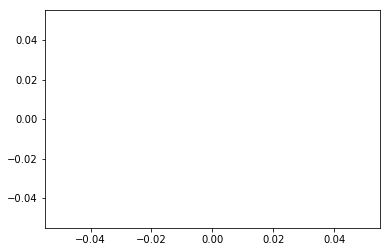

In [39]:
import matplotlib.pyplot as plt
plt.plot(result_all)
plt.show()

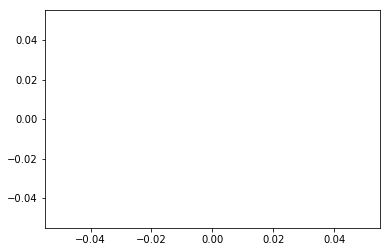

In [40]:
import matplotlib.pyplot as plt
plt.plot(result_w)
plt.show()